# Cleaning the data:

In [1]:
# Import required libraries
import pandas as pd

# Collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt 

# Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics
# import seaborn as sns  # Install seaborn in myEnvPy3 environment

In [13]:
# Load the split data
data = pd.read_csv('./data/processedData/10-07-20-08.csv')

In [6]:
# To describe the data with count, mean, std, min, etc..

# data.describe()

In [15]:
# To see the top part of data

# data.head()

In [25]:
# To see the bottom part of the data

# data.tail()

In [17]:
# To see a sample of whole data

# data.sample(5)

In [18]:
# To check datatype and other info of each column
# By lookin at total number of entries and number of non-null objects we can check 
# if there are any null values or missing data

# data.info()

In [79]:
# Mapping 'face_engaged': no = 0; yes = 1
# With yes and no: face_looking away, face_engaged

yesNoList = ['face_engaged', 'face_lookingaway']

for i in range(len(yesNoList)):
    data[yesNoList[i]] = data[yesNoList[i]].map( {'no': 0, 'yes': 1, 'unknown': 0} ).astype(int)
    
# Mapping 'face_glasses': unknown & no = 0; yes = 1 ###Commented and created a loop###
# data['face_glasses'] = data['face_glasses'].map( {'no': 0, 'yes': 1, 'unknown': 0} ).astype(int)

# unknown, no yes: face_happy, face_lefteyeclosed, face_mouthmoved, face_mouthopen, face_righteyeclosed
unknownYesNoList = ['face_glasses', 'face_happy', 'face_lefteyeclosed', 'face_mouthmoved',
                    'face_mouthopen', 'face_righteyeclosed']
for i in range(len(unknownYesNoList)):
    data[unknownYesNoList[i]] = data[unknownYesNoList[i]].map( {'no': 0, 'yes': 1, 'unknown': 0} ).astype(int)

In [60]:
# Dropping face size since it's a column of zeros
# data.drop(columns=['face_size'])
# data
# data.describe()

In [59]:
# Dropping First column of indexes since it is redundant
# data.drop('Unnamed: 0', axis=1, inplace=True)
# data.sample()

In [5]:
# Visualizing individual features
# data['pedes_posX'].plot()

## Passing the data to a unsupervised learning algorithm:

In [15]:
# import required libraries
from sklearn import preprocessing
import numpy as np

In [16]:
# Scaling features to a range
# initialize Min-max scaler
minMaxScaler = preprocessing.MinMaxScaler()

# copy df to be compared later
unprocessData = data

In [17]:
# Normalizing Data
# dataNormalized = preprocessing.normalize(unprocessData, norm='l2')

# MinMax Scaling Unprocessed Data
dataMinMax = minMaxScaler.fit_transform(unprocessData)

# MinMax Scaling Normalized Data
# dataMinMax = minMaxScaler.fit_transform(dataNormalized)

## To Check if k-value for PCA retains 99% of variance:

In [88]:
# Create Covariance Matrix
numTrainEg = dataMinMax.shape
covarMatrix = (1/numTrainEg[0])*(np.matmul(dataMinMax.T, dataMinMax))
covarMatrix.shape
# Get svd of Covariance Matrix
u, s, v = np.linalg.svd(covarMatrix, full_matrices=True)
# Checking how much variance we have retained
sum(s[:2])/sum(s)

0.8834624645663419

## Try k-means clustering

In [97]:
# Try k-means clustering
# import clusters
from sklearn import cluster

# initialize k-means
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(dataMinMax)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [115]:
# labels = k_means.labels_
# centers = k_means.cluster_centers_
# help(k_means)

In [18]:
from sklearn.decomposition import PCA
import numpy as np

kmeansReduced = cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)

# reduced_data = PCA(n_components=2).fit_transform(dataNormalized)
reduced_data = PCA(n_components=2).fit_transform(dataMinMax)

kmeansReduced.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeansReduced.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeansReduced.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
# plt.title('K-means clustering on Normalized Data\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Make a selection
# plt.savefig('kMeansMinMaxPCA.eps', format='eps', dpi=100)
# plt.savefig('kMeansNormalizedPCA.eps', format='eps', dpi=100)
# plt.savefig('kMeansNormMinMaxPCA.eps', format='eps', dpi=100)
plt.show()


NameError: name 'cluster' is not defined

In [87]:
# Only Testing PCA
from sklearn.decomposition import PCA
import numpy as np

# kmeansReduced = cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)

# reduced_data = PCA(n_components=2).fit_transform(dataNormalized)
reduced_data = PCA(n_components=2)
reduced_data.fit_transform(dataMinMax)
print(reduced_data.explained_variance_ratio_.cumsum())

[0.3994836  0.58945631]


In [5]:
tomoyaData = pd.read_csv('tomoyoLeapCat_100_0.csv')

In [6]:
tomoyaData.sample(5)

,Unnamed: 0,Time,thumbProximal_L_X,thumbProximal_L_Y,thumbProximal_L_Z,thumbDistal_L_X,thumbDistal_L_Y,thumbDistal_L_Z,thumbEF_L_X,thumbEF_L_Y,...,armFrontRadius_R_Z,armFrontUnla_R_X,armFrontUnla_R_Y,armFrontUnla_R_Z,armBackLateral_R_X,armBackLateral_R_Y,armBackLateral_R_Z,armBackMedial_R_X,armBackMedial_R_Y,armBackMedial_R_Z
13,13,13,-0.154221,-0.009801,0.351608,-0.154221,-0.009801,0.351608,-0.125315,0.021736,...,0.320950,0.071754,-0.031825,0.354184,0.191447,-0.170060,0.207293,0.208151,-0.180164,0.240527
31,31,31,-0.154094,-0.009933,0.351446,-0.154094,-0.009933,0.351446,-0.125453,0.021754,...,0.307211,0.077601,-0.025145,0.341086,0.193232,-0.174480,0.202013,0.209081,-0.183807,0.235887
64,64,64,-0.154779,-0.009379,0.351216,-0.154779,-0.009379,0.351216,-0.126826,0.022690,...,0.296780,0.208874,-0.014308,0.330060,0.160117,-0.214562,0.218106,0.173198,-0.228937,0.251386
77,77,77,-0.154391,-0.009295,0.350695,-0.154391,-0.009295,0.350695,-0.126037,0.022484,...,0.290330,0.178661,-0.004194,0.325022,0.171782,-0.210765,0.214251,0.183721,-0.222570,0.248943
70,70,70,-0.154457,-0.009486,0.351018,-0.154457,-0.009486,0.351018,-0.126409,0.022589,...,0.295726,0.199935,-0.009963,0.330075,0.164159,-0.211359,0.215317,0.174564,-0.225407,0.249667


Audio Data Test

# Deep Learning

In [106]:
# Drop last n rows
n = 100
data.drop(data.tail(n).index,inplace=True)

In [115]:
# Seperate into three new df
approachDf = data.iloc[:300, :]
interactDf = data.iloc[300:600, :]
leaveDf = data.iloc[600:, :]

In [122]:
approachDf.to_csv('approachDf' + '.csv')
interactDf.to_csv('interactDf' + '.csv')
leaveDf.to_csv('leaveDf' + '.csv')


In [2]:
# Tomoya part
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.contrib import rnn
from keras.utils import to_categorical
from itertools import chain
import matplotlib.pyplot as plt
import csv
import seaborn as sn
from sklearn.metrics import confusion_matrix

Instructions for updating:
Use the retry module or similar alternatives.


Using TensorFlow backend.


In [8]:
def labels_2_one_hots(labels=''):
    words = []
    new_word_id = 0
    dictionary = {}
    labels = labels[:, np.newaxis]
    # sort by alphabetical order
    labelsSorted = np.sort(labels, axis=0)

    for word in labelsSorted:
        if word[0] not in dictionary:
            dictionary[word[0]] = new_word_id
            new_word_id += 1


    for word in labels:
        words.append(dictionary[word[0]])

    one_hots = to_categorical(words)
    dictionary_inv = {dictionary[k]: k for k in dictionary}

    return dictionary, one_hots, dictionary_inv

In [5]:
def get_train_test_data():

    # Get current working directory of process
    cwd = os.getcwd()
    path = cwd + '/data' + '/deepLearning'
    files = []
    for file in os.listdir(path):
        if file.endswith(".csv"):
            files.append(file)

    files = np.array(files)
    labelsOutput = []
    InputAll = []

    for i in range(0, int(files.shape[0])):
        dfInput = pd.read_csv(path + '/' + files[i], sep=',')
    #     dfInput.dropna(how='any') # Drop missing values
        dfInput.drop(['Unnamed: 0'], axis=1, inplace=True)
        print(files[i] + ' open')
        label = str.lower(files[i][:-4]) # Remove '.csv'
        InputNames = dfInput.columns

        Input = dfInput.as_matrix() # Convert the frame to its Numpy-array representation
        nCut = int(Input.shape[0] / 100)  

        # Convert from Rows, Columns(2D) to nCut, 100, Columns(3D)
        Input = np.array(np.split(Input, nCut, axis=0))
        # Transpose to 100, Columns, nCut
        Input = Input.transpose([1, 2, 0])

        labelsOutput.append([label for j in range(0, nCut)])

        if InputAll == []:
            InputAll = Input
        else:
            InputAll = np.concatenate([InputAll, Input], axis=2)

    labelsOutput = np.array(list(chain.from_iterable(labelsOutput))) # chain('ABC', 'DEF') --> A B C D E F

    p = np.random.permutation(InputAll.shape[2])

    InputAll = InputAll[:, :, p]

    labelsOutput = labelsOutput[p]

    dictionary, one_hots, dictionary_inv = labels_2_one_hots(labelsOutput)
    
    return InputAll, dictionary, one_hots, InputNames, dictionary_inv

In [6]:
def standardize_data(data):
    std = []
    mean = []
    dataOut = data.copy()

    std.append(np.std(data, ddof=1))
    mean.append(np.mean(data))
    dataOut = (data - mean) / std

    dataOut[np.isnan(dataOut)] = 0

    return dataOut, mean, std


In [9]:
InputAll, dictionary, one_hots, InputNames, dictionary_inv = get_train_test_data()

leaveDf.csv open
approachDf.csv open
interactDf.csv open


/home/sp/anaconda3/envs/myEnvPy3/lib/python3.6/site-packages/ipykernel/__main__.py:33: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [10]:
class RNN:
    def __init__(RNN):

#         RNN.hm_epochs = 10000
        RNN.hm_epochs = 3

    def set_Data(RNN, Input, Output, InputNames, LabelsDict, dictionary_inv):

        RNN.InputNames = InputNames
        RNN.OutputNames = sorted(LabelsDict, key = LabelsDict.get, reverse = False)
        RNN.dictionary = LabelsDict
        RNN.dictionary_inv = dictionary_inv

        RNN.n_samples = Input.shape[2]
        RNN.training_size = int(0.8 * RNN.n_samples)
        RNN.testing_size = int(0.2 * RNN.n_samples)

        Input_N, RNN.meanInput, RNN.stdInput = standardize_data(Input)

        RNN.train_x = np.array(Input[:, :, :RNN.training_size]).astype('float32')
        RNN.train_x = np.transpose(RNN.train_x, [2, 0, 1])
        RNN.train_y = np.array(Output[:RNN.training_size])

        RNN.test_x = np.array(Input[:, :, -RNN.testing_size:]).astype('float32')
        RNN.test_x = np.transpose(RNN.test_x, [2, 0, 1])
        RNN.test_y = np.array(Output[-RNN.testing_size:])

        RNN.train_x_N = np.array(Input_N[:, :, :RNN.training_size]).astype('float32')
        RNN.train_x_N = np.transpose(RNN.train_x_N, [2, 0, 1])
        RNN.test_x_N = np.array(Input_N[:, :, -RNN.testing_size:]).astype('float32')
        RNN.test_x_N = np.transpose(RNN.test_x_N, [2, 0, 1])

    def train_neural_network(RNN, InputAll, one_hots):

        errorHistory =[]

        tf.reset_default_graph()

        sess = tf.Session()

        frames = 100
#         n_Joint = 162
        n_Joint = 58

        CellSize = 10
#         OutputSize = 20
        OutputSize = 3

        RNN.x = tf.placeholder('float32',
                           [None, frames, n_Joint])  # TensorShape([Dimension(None), Dimension(28), Dimension(28)])
        RNN.y = tf.placeholder('float32', [None, OutputSize])


        layer = {'weights': tf.Variable(tf.random_normal([CellSize, OutputSize])),
                 'biases': tf.Variable(tf.random_normal([OutputSize]))}

        x = tf.transpose(RNN.x, [1, 0, 2])  # TensorShape([Dimension(28), Dimension(None), Dimension(28)])
        x = tf.reshape(x, [-1, n_Joint])
        x = tf.split(x, frames, 0)  # len(x) = 100

        lstm_cell = rnn.BasicRNNCell(CellSize)

        outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

        RNN.y_ = tf.matmul(outputs[-1], layer['weights']) + layer['biases']

        learningRate = 0.01
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=RNN.y_, labels=RNN.y))
        optimizer = tf.train.AdamOptimizer(learning_rate=learningRate).minimize(cost)

        correct = tf.equal(tf.argmax(RNN.y_, 1), tf.argmax(RNN.y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

        sess.run(tf.global_variables_initializer())

        for epoch in range(RNN.hm_epochs):

            _, c = sess.run([optimizer, cost], feed_dict={RNN.x:RNN.train_x_N , RNN.y: RNN.train_y})
            errorHistory.append(c)
            if epoch > 100:
                if epoch % 100 == 0:
                    if abs(errorHistory[epoch] - errorHistory[epoch-100]) < 0.01:
                        break
            print('Epoch', epoch, 'completed out of', RNN.hm_epochs, 'loss:', c)

        test_data = {RNN.x: RNN.test_x_N, RNN.y: RNN.test_y}

        RNN.accuracy = sess.run(accuracy, feed_dict = test_data)

        input_data = {RNN.x: RNN.test_x_N}

        RNN.output_rnn = sess.run(RNN.y_, feed_dict=input_data)

        RNN.output_probabilities = tf.nn.softmax(RNN.output_rnn)
        RNN.output_probabilities = sess.run(RNN.output_probabilities)
        RNN.output_probabilities = np.array(RNN.output_probabilities)

        RNN.output_OneHot = (RNN.output_probabilities == RNN.output_probabilities.max(axis = 1, keepdims = True)).astype(int)

        RNN.output_label = []

        for i in range(0, len(RNN.dictionary)):
            RNN.output_label_temp = RNN.dictionary_inv.get(np.argmax(RNN.output_OneHot[i]))
            RNN.output_label = np.append(RNN.output_label, RNN.output_label_temp)
            # RNN.output_label = np.core.defchararray.add(RNN.output_label, RNN.output_label_temp)

        print('Accuracy:', RNN.accuracy)
        plt.figure()
        plt.plot(errorHistory)
        plt.title('Loss_value')
        plt.savefig('Loss' + RNN.accuracy + '.png')

        f = open('loss' + RNN.accuracy + '.csv', 'w')
        writer = csv.writer(f, lineterminator='/n')
        writer.writerow(errorHistory)
        f.close()

    def draw_confusion_matrix(RNN):

        RNN.test_label = []

        for i in range(0, len(RNN.dictionary)):
            RNN.test_label_temp = RNN.dictionary_inv.get(np.argmax(RNN.test_y[i]))
            RNN.test_label = np.append(RNN.test_label, RNN.test_label_temp)

        labels = sorted(list(set(RNN.test_label)))
        cmx_data = confusion_matrix(RNN.test_label, RNN.output_label, labels=labels)
        with np.errstate(divide='ignore', invalid='ignore'):
            cmx_data_N = np.true_divide(cmx_data, cmx_data.astype(np.float).sum(axis=0))
            cmx_data_N = np.nan_to_num(cmx_data_N)

        df_cmx = pd.DataFrame(cmx_data.T, index=labels, columns=labels)
        df_cmx_N = pd.DataFrame(cmx_data_N.T, index=labels, columns=labels)

        np.savetxt('100.txt', cmx_data_N)

        # plt.figure()
        # sn.heatmap(df_cmx, vmax=1, vmin=0, annot=True, robust=True)
        # plt.show()

        plt.figure(figsize=(30,30))
        sn.heatmap(df_cmx_N, vmax=1, vmin=0, annot=True)
        plt.show()
        plt.savefig('cmx.png')

In [11]:
RNN = RNN()
RNN.set_Data(Input=InputAll, Output=one_hots, InputNames=InputNames, LabelsDict=dictionary, dictionary_inv=dictionary_inv)
print('-----done.')
RNN.train_neural_network(InputAll, one_hots)
RNN.draw_confusion_matrix()

-----done.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Epoch 0 completed out of 3 loss: 2.6970484
Epoch 1 completed out of 3 loss: 1.9913989
Epoch 2 completed out of 3 loss: 1.3917367


IndexError: index 1 is out of bounds for axis 0 with size 1

In [1]:
import numpy as np

In [6]:
data = np.load("/home/sp/multiPartyHRI/data_har.npz")
for key, value in data.items():
    np.savetxt("/home/sp/multiPartyHRI" + key + ".csv", value)

ValueError: Expected 1D or 2D array, got 3D array instead

In [3]:
def splitData(dataFrame):
    # Mapping 'face_engaged': no = 0; yes = 1
    # With yes and no: face_looking away, face_engaged

    yesNoList = ['face_engaged', 'face_lookingaway']

    for i in range(len(yesNoList)):
        data[yesNoList[i]] = data[yesNoList[i]].map( {'no': 0, 'yes': 1, 'unknown': 0} ).astype(int)

    # Mapping 'face_glasses': unknown & no = 0; yes = 1 ###Commented and created a loop###
    # data['face_glasses'] = data['face_glasses'].map( {'no': 0, 'yes': 1, 'unknown': 0} ).astype(int)

    # unknown, no yes: face_happy, face_lefteyeclosed, face_mouthmoved, face_mouthopen, face_righteyeclosed
    unknownYesNoList = ['face_glasses', 'face_happy', 'face_lefteyeclosed', 'face_mouthmoved',
                        'face_mouthopen', 'face_righteyeclosed']
    for i in range(len(unknownYesNoList)):
        data[unknownYesNoList[i]] = data[unknownYesNoList[i]].map( {'no': 0, 'yes': 1, 'unknown': 0} ).astype(int)
        
    return data

# Preprocessing Data

In [1]:
import numpy as np
from scipy import stats
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Import all labeled files
path = os.path.expanduser("~/MultiPartyHRI/data/labeledData/")
fileInList = list(os.path.join(path+f) for f in os.listdir(path))
data = pd.concat((pd.read_csv(f) for f in fileInList))

# Import individual labeled files
# data = pd.read_csv('./data/processedData/10-07-20-08.csv')
# data = pd.read_csv('./data/processedData/12-07-18-08.csv')
# data = pd.concat([data1, data2])

19577


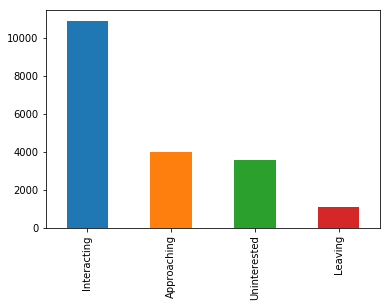

In [3]:
print(data.shape[0])
data['Activity'].value_counts().plot(kind='bar')

In [5]:
featureNames = list(data.columns)
featureNames.remove('Activity')
# featuresToNormalize = [e for e in featureNames if e not in ('Activity', 'face_engaged', 'face_glasses', 'face_happy', 'face_lefteyeclosed', 'face_lookingaway', 'face_mouthmoved',
# 'face_mouthopen')]

In [6]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis = 0)
    return (dataset - mu)/sigma

In [9]:
data.dropna(axis=0, how='any', inplace= True)
for i in range(1,len(featureNames)):
    if featureNames[i] == 'timeStamp':
        pass
    else:
        data[featureNames[i]] = feature_normalize(data[featureNames[i]]) 


In [10]:
def timeStampToFloat(stringTime):
    splitTime = stringTime.split(':')
    hour = float(splitTime[0]) * 3600
    minutes = float(splitTime[1]) * 60
    return hour + minutes + float(splitTime[2])

In [11]:
data['timeStamp'] = data['timeStamp'].apply(timeStampToFloat)

## Plotting Functions

In [41]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

In [42]:
def plot_activity(activity,data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (10, 8), sharex = True)
    plot_axis(ax0, data['Unnamed: 0'], data['pedes_posX'], 'pedes_posX')
    plot_axis(ax1, data['Unnamed: 0'], data['pedes_posY'], 'pedes_posY')
    plot_axis(ax2, data['Unnamed: 0'], data['pedes_posZ'], 'pedes_posZ')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
#     plt.savefig('foo.jpg')
    plt.show()
    

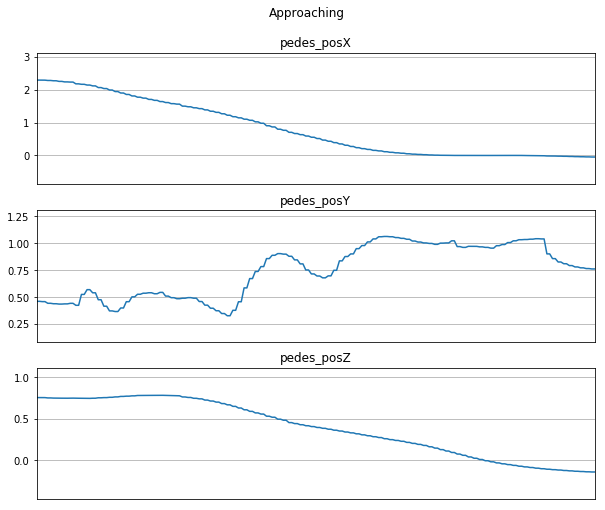

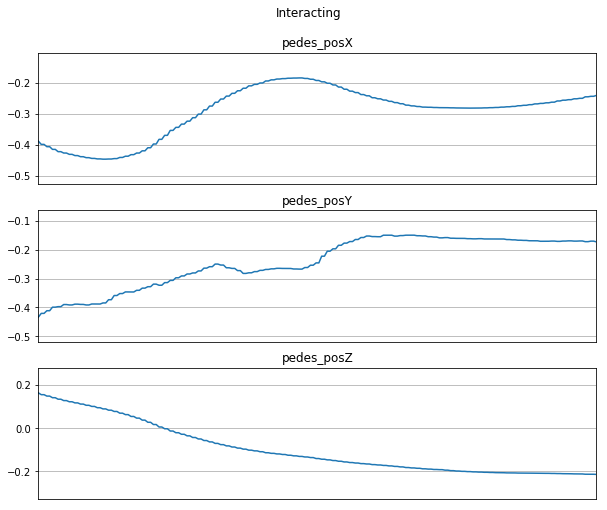

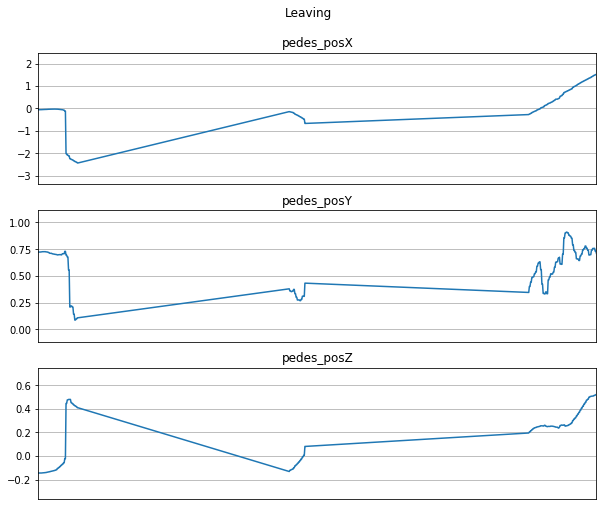

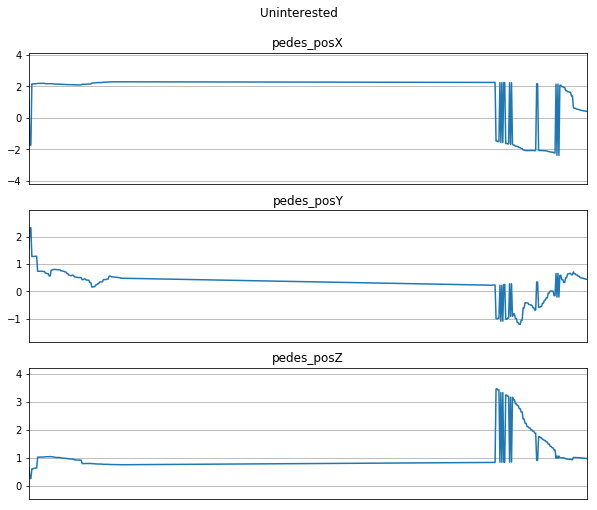

In [43]:
for activity in np.unique(data["Activity"]):
    subset = data[data["Activity"] == activity][:200]
    plot_activity(activity,subset)

## Prepare Dataset

In [12]:
numFeatures = 58
windowSize = 90
def windows(data, size):
    start = 0
    while start < data.count():
        yield int(start), int(start + size)
        start += (size / 2)
        
def segment_signal(data,window_size = windowSize):
    segments = np.empty((0,window_size, numFeatures))
    labels = np.empty((0))
    x=[]
    for (start, end) in windows(data["Unnamed: 0"], window_size):
        for i in range(len(featureNames)):
            x.append(data[featureNames[i]][start:end])

        if(len(data["Unnamed: 0"][start:end]) == window_size):
            seg1 = np.dstack([x[i] for i in range(numFeatures)])
            segments = np.vstack([segments, seg1])
            labels = np.append(labels,stats.mode(data["Activity"][start:end])[0][0])
    
    return x, segments, labels

In [13]:
x, segments, labels = segment_signal(data)
labels = np.asarray(pd.get_dummies(labels), dtype = np.int8)
reshaped_segments = segments.reshape(len(segments), 1,windowSize,numFeatures)
segments.shape
# len(segments)

/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


(434, 90, 58)

In [14]:
train_test_split = np.random.rand(len(reshaped_segments)) < 0.60
train_x = reshaped_segments[train_test_split]
train_y = labels[train_test_split]
test_x = reshaped_segments[~train_test_split]
test_y = labels[~train_test_split]

In [20]:
input_height = 1
input_width = windowSize
num_labels = 4
num_channels = numFeatures

batch_size = 10
kernel_size = 60
depth = 60
num_hidden = 1000

learning_rate = 0.1
training_epochs = 7

total_batchs = train_x.shape[0] // batch_size

In [16]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.0, shape = shape)
    return tf.Variable(initial)
	
def depthwise_conv2d(x, W):
    return tf.nn.depthwise_conv2d(x,W, [1, 1, 1, 1], padding='VALID')
	
def apply_depthwise_conv(x,kernel_size,num_channels,depth):
    weights = weight_variable([1, kernel_size, num_channels, depth])
    biases = bias_variable([depth * num_channels])
    return tf.nn.relu(tf.add(depthwise_conv2d(x, weights),biases))
    
def apply_max_pool(x,kernel_size,stride_size):
    return tf.nn.max_pool(x, ksize=[1, 1, kernel_size, 1], 
                          strides=[1, 1, stride_size, 1], padding='VALID')

In [17]:
X = tf.placeholder(tf.float32, shape=[None,input_height,input_width,num_channels])
Y = tf.placeholder(tf.float32, shape=[None,num_labels])

c = apply_depthwise_conv(X,kernel_size,num_channels,depth)
p = apply_max_pool(c,20,2)
c = apply_depthwise_conv(p,6,depth*num_channels,depth//10)

shape = c.get_shape().as_list()
c_flat = tf.reshape(c, [-1, shape[1] * shape[2] * shape[3]])

f_weights_l1 = weight_variable([shape[1] * shape[2] * depth * num_channels * (depth//10), num_hidden])
f_biases_l1 = bias_variable([num_hidden])
f = tf.nn.tanh(tf.add(tf.matmul(c_flat, f_weights_l1),f_biases_l1))

out_weights = weight_variable([num_hidden, num_labels])
out_biases = bias_variable([num_labels])
y_ = tf.nn.softmax(tf.matmul(f, out_weights) + out_biases)

In [18]:
loss = -tf.reduce_sum(Y * tf.log(y_))
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
with tf.Session() as session:
    tf.global_variables_initializer().run()
    for epoch in range(training_epochs):
        cost_history = np.empty(shape=[1],dtype=float)
        for b in range(total_batchs):    
            offset = (b * batch_size) % (train_y.shape[0] - batch_size)
            batch_x = train_x[offset:(offset + batch_size), :, :, :]
            batch_y = train_y[offset:(offset + batch_size), :]
            _, c = session.run([optimizer, loss],feed_dict={X: batch_x, Y : batch_y})
            cost_history = np.append(cost_history,c)
        print ("Epoch: ",epoch," Training Loss: ",np.mean(cost_history)," Training Accuracy: ",
              session.run(accuracy, feed_dict={X: train_x, Y: train_y}))
    
    print ("Testing Accuracy:", session.run(accuracy, feed_dict={X: test_x, Y: test_y}))

InvalidArgumentError: Reshape cannot infer the missing input size for an empty tensor unless all specified input sizes are non-zero
	 [[Node: Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Relu_1, Reshape/shape)]]

Caused by op 'Reshape', defined at:
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/asyncio/base_events.py", line 1431, in _run_once
    handle._run()
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-7a4905bb55f7>", line 9, in <module>
    c_flat = tf.reshape(c, [-1, shape[1] * shape[2] * shape[3]])
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 6197, in reshape
    "Reshape", tensor=tensor, shape=shape, name=name)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Reshape cannot infer the missing input size for an empty tensor unless all specified input sizes are non-zero
	 [[Node: Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Relu_1, Reshape/shape)]]


In [152]:
help(tf.train)

Help on package tensorflow.train in tensorflow:

NAME
    tensorflow.train - Support for training models.

DESCRIPTION
    See the @{$python/train} guide.

PACKAGE CONTENTS
    queue_runner (package)

FILE
    /home/gvlab/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/train/__init__.py




# DeepSense

In [1]:
line = {'Gyro': [1,2,3], 'Acce': [2,3,4], 'Time': 123}
print(eval(line))

TypeError: eval() arg 1 must be a string, bytes or code object